Simple notebook to explore the variables present in the dataset. 

Please upvote if you find it useful :)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 120)

Please note that, in this competition HDF5 file is being used instead of csv.

In [3]:
with pd.HDFStore("../data/train.h5", "r") as train:
    # Note that the "train" dataframe is the only dataframe in the file
    df = train.get("train")

**Sneak-peek at the data:**

Let us look at the top few rows to understand the variables and the nature of data

In [4]:
df.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,fundamental_6,fundamental_7,fundamental_8,fundamental_9,fundamental_10,fundamental_11,fundamental_12,fundamental_13,fundamental_14,fundamental_15,fundamental_16,fundamental_17,fundamental_18,fundamental_19,fundamental_20,fundamental_21,fundamental_22,fundamental_23,fundamental_24,fundamental_25,fundamental_26,fundamental_27,fundamental_28,fundamental_29,fundamental_30,fundamental_31,fundamental_32,fundamental_33,fundamental_34,fundamental_35,fundamental_36,fundamental_37,fundamental_38,fundamental_39,fundamental_40,fundamental_41,fundamental_42,fundamental_43,fundamental_44,fundamental_45,fundamental_46,fundamental_47,fundamental_48,fundamental_49,fundamental_50,fundamental_51,fundamental_52,fundamental_53,fundamental_54,fundamental_55,fundamental_56,fundamental_57,fundamental_58,fundamental_59,fundamental_60,fundamental_61,fundamental_62,fundamental_63,technical_0,technical_1,technical_2,technical_3,technical_5,technical_6,technical_7,technical_9,technical_10,technical_11,technical_12,technical_13,technical_14,technical_16,technical_17,technical_18,technical_19,technical_20,technical_21,technical_22,technical_24,technical_25,technical_27,technical_28,technical_29,technical_30,technical_31,technical_32,technical_33,technical_34,technical_35,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,-0.179404,NaN,-0.072108,0.249187,0.024401,-0.127942,NaN,1.412742,-0.029575,1.265246,-0.055747,1.592256,-0.285275,-0.212888,0.404180,0.116903,0.197590,-0.197455,-0.195023,-0.059886,-0.021199,-0.013555,-0.236371,-0.253357,0.575562,0.283947,-0.006208,0.616351,-0.034578,0.732652,-0.002432,-0.092508,-0.072185,0.447296,-0.194318,0.264373,0.018763,NaN,-0.145278,-0.108547,0.148189,-0.226942,0.262864,-0.252933,-0.113265,0.180559,-0.033812,0.042951,-0.068031,0.208402,-0.082743,1.061059,1.120801,-0.228200,-0.119987,-0.131929,-0.145985,-0.155989,NaN,0.037680,NaN,NaN,-2.0,NaN,NaN,-2.0,-0.273957,NaN,-2.0,-2.0,NaN,0.001652,-2.0,NaN,-2.0,NaN,0.652981,0.000000,-0.142453,0.0,NaN,NaN,1.427469,NaN,-2.0,0.0,NaN,NaN,NaN,0.0,0.937880,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,0.216281,0.09675,0.082042,-0.224383,-0.085529,0.024763,-0.062337,-0.202247,1.746692,-0.187505,-0.034664,-0.135177,0.305562,0.027595,-0.208746,0.118520,-0.123511,0.113818,NaN,-0.115837,0.028282,0.076565,-0.217346,0.100054,0.358808,0.057505,0.025719,-0.141339,2.293476,0.024945,0.388208,-0.240927,-0.126232,-0.131619,0.232268,-0.001455,-0.489863,0.017317,0.027321,0.334183,0.113513,0.111536,-0.179379,0.221287,-0.091886,NaN,0.107982,0.548687,-0.160079,-0.281368,0.063933,-0.235643,-0.205083,-0.194349,-0.365186,0.041928,-0.044907,-0.039079,-0.075000,-0.280418,NaN,NaN,-2.0,NaN,NaN,-2.0,-0.159432,NaN,0.0,-2.0,NaN,0.004317,0.0,NaN,-2.0,NaN,-0.399520,0.000000,-0.309356,-0.5,NaN,NaN,0.154613,NaN,0.0,0.0,NaN,NaN,NaN,0.5,0.232154,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,NaN,NaN,-0.051418,-0.258330,-0.122140,-0.121041,-0.058287,-0.899515,-0.022131,-0.079002,-0.031116,-0.100603,-0.341474,-0.007522,0.077977,-0.149581,0.036946,0.166182,NaN,0.172751,0.961091,1.028205,-0.165369,0.056006,NaN,0.249530,-0.156078,NaN,0.019192,0.053364,-0.020247,NaN,0.064028,-0.249106,-0.106216,-0.085509,0.383589,NaN,-0.074021,-0.054295,-0.746073,-0.057605,-0.126238,0.462523,0.060902,NaN,-0.262892,-0.059395,0.562975,-0.026392,0.013430,-0.627150,-0.470362,-0.101865,0.436794,-0.057049,-0.120851,-0.061941,-0.600019,0.138357,NaN,NaN,-2.0,NaN,NaN,-2.0,-0.227811,NaN,-2.0,-2.0,NaN,0.000000,-2.0,NaN,-2.0,NaN,-0.496284,0.006942,0.122841,-0.5,NaN,NaN,0.378332,NaN,-2.0,

So there are 111 columns present in the dataset.

- 1 id column
- 1 timestamp column
- 5 columns with name prefix 'derived'
- 63 columns with name prefix 'fundamental' - fundamental_0 to fundamental_63 - 'fundamental_4' is missing. Any specific reasons?
- 40 columns with name prefix 'technical' - technical_0 to technical_44 - technical_4, technical_8, technical_15, technical_23, technical_26 are missing.  
- 1 target variable named 'y'

Now let us look at the distribution of data in each of these columns

In [5]:
df.describe()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,fundamental_6,fundamental_7,fundamental_8,fundamental_9,fundamental_10,fundamental_11,fundamental_12,fundamental_13,fundamental_14,fundamental_15,fundamental_16,fundamental_17,fundamental_18,fundamental_19,fundamental_20,fundamental_21,fundamental_22,fundamental_23,fundamental_24,fundamental_25,fundamental_26,fundamental_27,fundamental_28,fundamental_29,fundamental_30,fundamental_31,fundamental_32,fundamental_33,fundamental_34,fundamental_35,fundamental_36,fundamental_37,fundamental_38,fundamental_39,fundamental_40,fundamental_41,fundamental_42,fundamental_43,fundamental_44,fundamental_45,fundamental_46,fundamental_47,fundamental_48,fundamental_49,fundamental_50,fundamental_51,fundamental_52,fundamental_53,fundamental_54,fundamental_55,fundamental_56,fundamental_57,fundamental_58,fundamental_59,fundamental_60,fundamental_61,fundamental_62,fundamental_63,technical_0,technical_1,technical_2,technical_3,technical_5,technical_6,technical_7,technical_9,technical_10,technical_11,technical_12,technical_13,technical_14,technical_16,technical_17,technical_18,technical_19,technical_20,technical_21,technical_22,technical_24,technical_25,technical_27,technical_28,technical_29,technical_30,technical_31,technical_32,technical_33,technical_34,technical_35,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
count,1.710756e+06,1.710756e+06,1.637797e+06,1.629727e+06,1.312105e+06,1.561285e+06,1.304298e+06,1.686809e+06,1.031686e+06,1.341916e+06,1.256376e+06,748736.000000,1.009131e+06,1.684416e+06,1.337590e+06,1.145189e+06,1.597779e+06,1.341916e+06,1.599885e+06,1.355618e+06,1.354672e+06,1.355859e+06,1.355618e+06,1.613534e+06,1.694923e+06,1.656168e+06,1.599885e+06,1.656423e+06,1.152268e+06,1.354033e+06,1.134101e+06,1.588862e+06,1.053572e+06,1.429458e+06,1.043425e+06,1.356650e+06,1.355849e+06,1.256376e+06,1.599084e+06,1.696921e+06,1.275894e+06,1.286280e+06,1.694913e+06,1.354913e+06,907267.000000,1.333182e+06,1.431054e+06,1.680641e+06,1.687843e+06,1.356225e+06,1.354951e+06,1.694694e+06,1.354913e+06,1.264428e+06,1.694913e+06,1.152423e+06,1.355525e+06,1.263703e+06,1.556829e+06,1.686809e+06,1.326543e+06,1.341916e+06,1.341916e+06,1.053572e+06,1.568631e+06,1.694694e+06,1.355630e+06,1.038955e+06,1.597779e+06,1.335142e+06,1.691591e+06,1.583980e+06,1.706477e+06,1.612462e+06,1.557152e+06,1.706477e+06,1.708520e+06,1.691591e+06,1.543273e+06,1.706477e+06,1.691591e+06,1.705992e+06,1.696572e+06,1.690775e+06,1.706477e+06,1.690740e+06,1.708436e+06,1.705992e+06,1.708520e+06,1.710756e+06,1.639610e+06,1.502700e+06,1.708336e+06,1.447840e+06,1.649141e+06,1.705992e+06,1.528078e+06,1.691591e+06,1.696221e+06,1.710756e+06,1.707601e+06,1.708204e+06,1.691591e+06,1.691591e+06,1.690740e+06,1.708520e+06,1.666567e+06,1.690755e+06,1.706070e+06,1.473977e+06,1.710756e+06
mean,1.093858e+03,9.456257e+02,-4.537569e+00,7.729437e+11,-3.321289e-01,-5.047151e-01,1.803233e+01,-2.041142e-02,-5.703752e+08,-1.623607e-01,2.780523e-02,0.774936,1.405046e-01,4.874827e+01,8.001024e-02,-8.618432e-02,4.419556e-01,-2.534604e-01,6.172081e+01,1.333602e-01,3.127454e+00,2.118942e-01,-2.115117e-01,7.087520e+13,-8.233603e-01,3.990866e-01,-1.486431e+00,9.915095e-02,6.140606e-02,2.749388e+01,7.611224e-02,1.694109e-01,2.170799e+02,4.226159e+00,4.285147e-02,5.558766e-01,6.634521e-02,9.953959e-02,3.316753e+01,6.167027e+02,1.918426e+00,3.488266e-01,2.670321e+01,1.483909e-01,0.049368,2.712147e-01,-1.211488e-02,-4.697703e+02,1.320058e+02,2.344736e-01,1.720809e+00,1.471799e+00,1.867629e-01,6.525119e-02,-6.308026e-02,3.434374e-01,1.259204e+01,3.251730e-01,3.440430e-01,-1.666127e-01,1.882170e-01,-8.483781e-02,4.630978e-02,2.221376e-01,2.167233e-02,1.479572e-01,1.942570e-01,9.340959e+11,-5.293247e-02,1.522264e-01,-1.092671e-01,4.753821e-04,-9.031900e-01,1.216695e-03,7.961768e-04,-9.517112e-01,5.059636e-02,-2.304468e-02,-7.

It seems NaN values are present in all input columns but  for two (technical_22 and technical_34).

So let us count the number of missing values in each of the columns.

In [6]:
labels = []
values = []
for col in df.columns:
    labels.append(col)
    values.append(df[col].isnull().sum())
    print(col, values[-1])

id 0
timestamp 0
derived_0 72959
derived_1 81029
derived_2 398651
derived_3 149471
derived_4 406458
fundamental_0 23947
fundamental_1 679070
fundamental_2 368840
fundamental_3 454380
fundamental_5 962020
fundamental_6 701625
fundamental_7 26340
fundamental_8 373166
fundamental_9 565567
fundamental_10 112977
fundamental_11 368840
fundamental_12 110871
fundamental_13 355138
fundamental_14 356084
fundamental_15 354897
fundamental_16 355138
fundamental_17 97222
fundamental_18 15833
fundamental_19 54588
fundamental_20 110871
fundamental_21 54333
fundamental_22 558488
fundamental_23 356723
fundamental_24 576655
fundamental_25 121894
fundamental_26 657184
fundamental_27 281298
fundamental_28 667331
fundamental_29 354106
fundamental_30 354907
fundamental_31 454380
fundamental_32 111672
fundamental_33 13835
fundamental_34 434862
fundamental_35 424476
fundamental_36 15843
fundamental_37 355843
fundamental_38 803489
fundamental_39 377574
fundamental_40 279702
fundamental_41 30115
fundamental_42 2

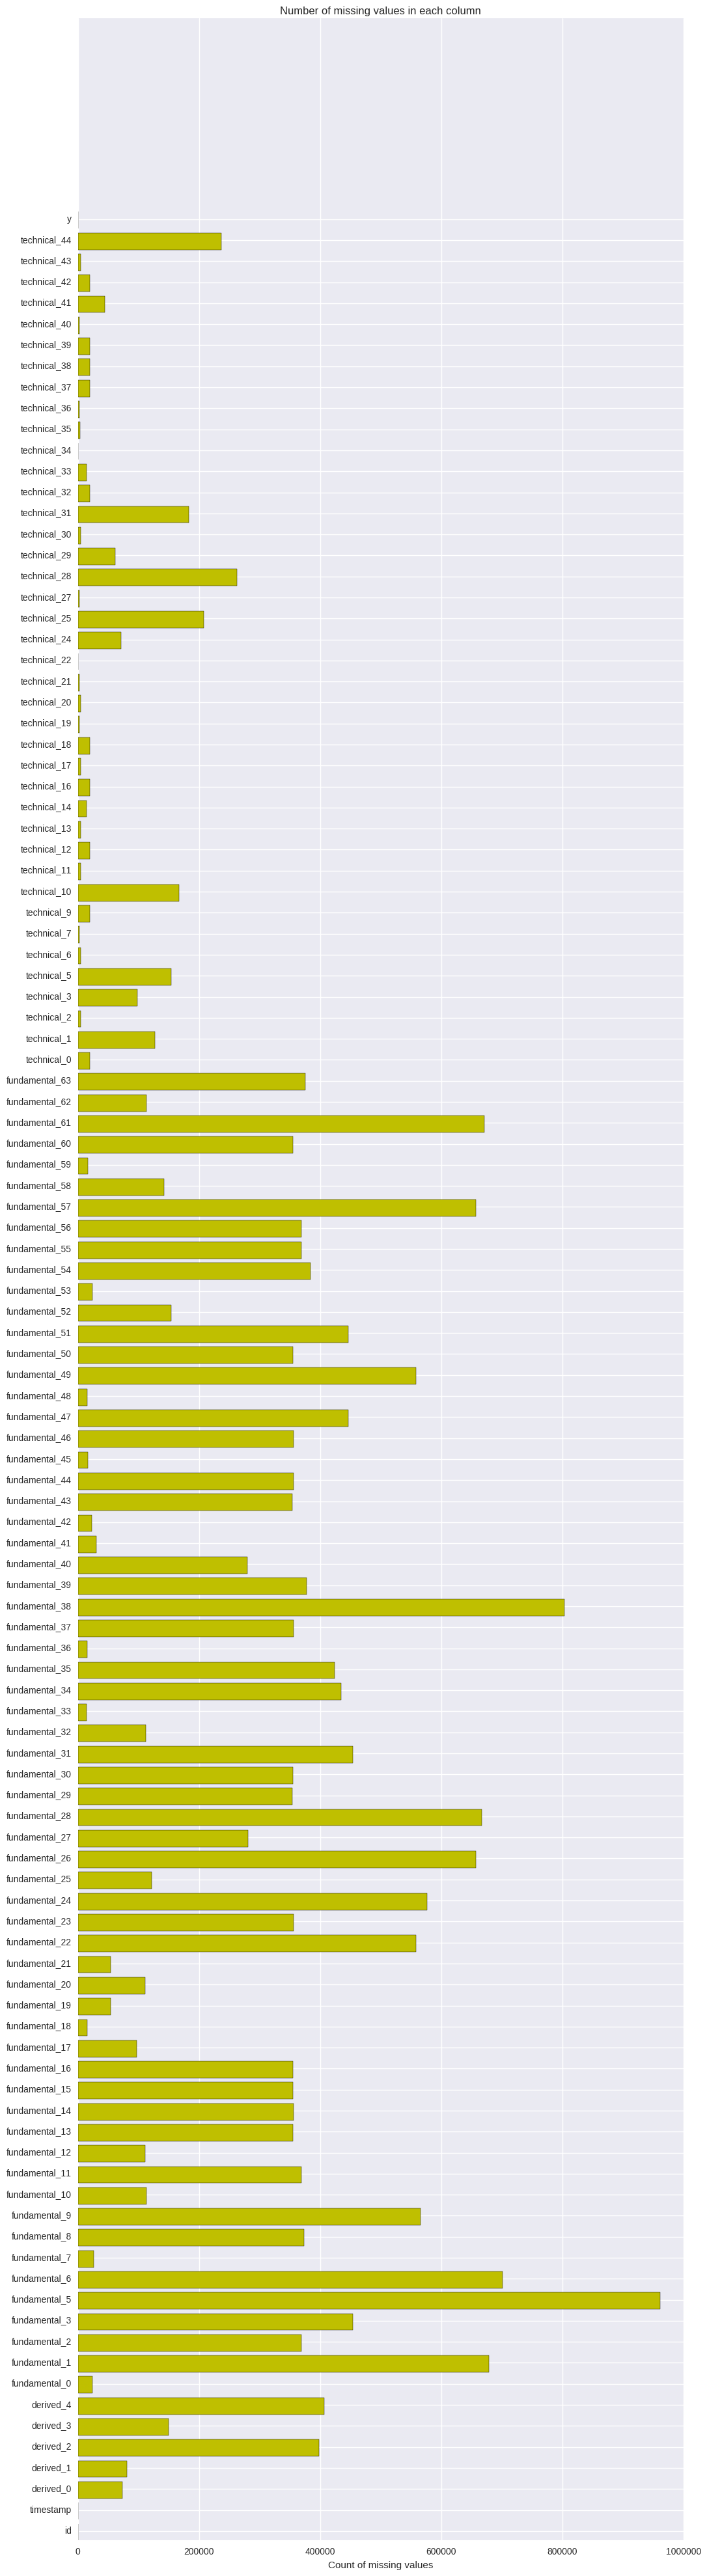

In [7]:
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,50))
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
#autolabel(rects)
plt.show()

Fundamental_5 has the most number of missing values followed by fundamental_38.

**Distribution plot:**

Now let us look at the distribution plot of some of the numeric variables. 

Univariate analysis from [this notebook][1] reveals some important variables. So let us look at the plots of  top 4 variables.

- technical_30
- technical_20
- fundamental_11
- technical_19

  [1]: https://www.kaggle.com/sudalairajkumar/two-sigma-financial-modeling/univariate-analysis-regression-lb-0-006

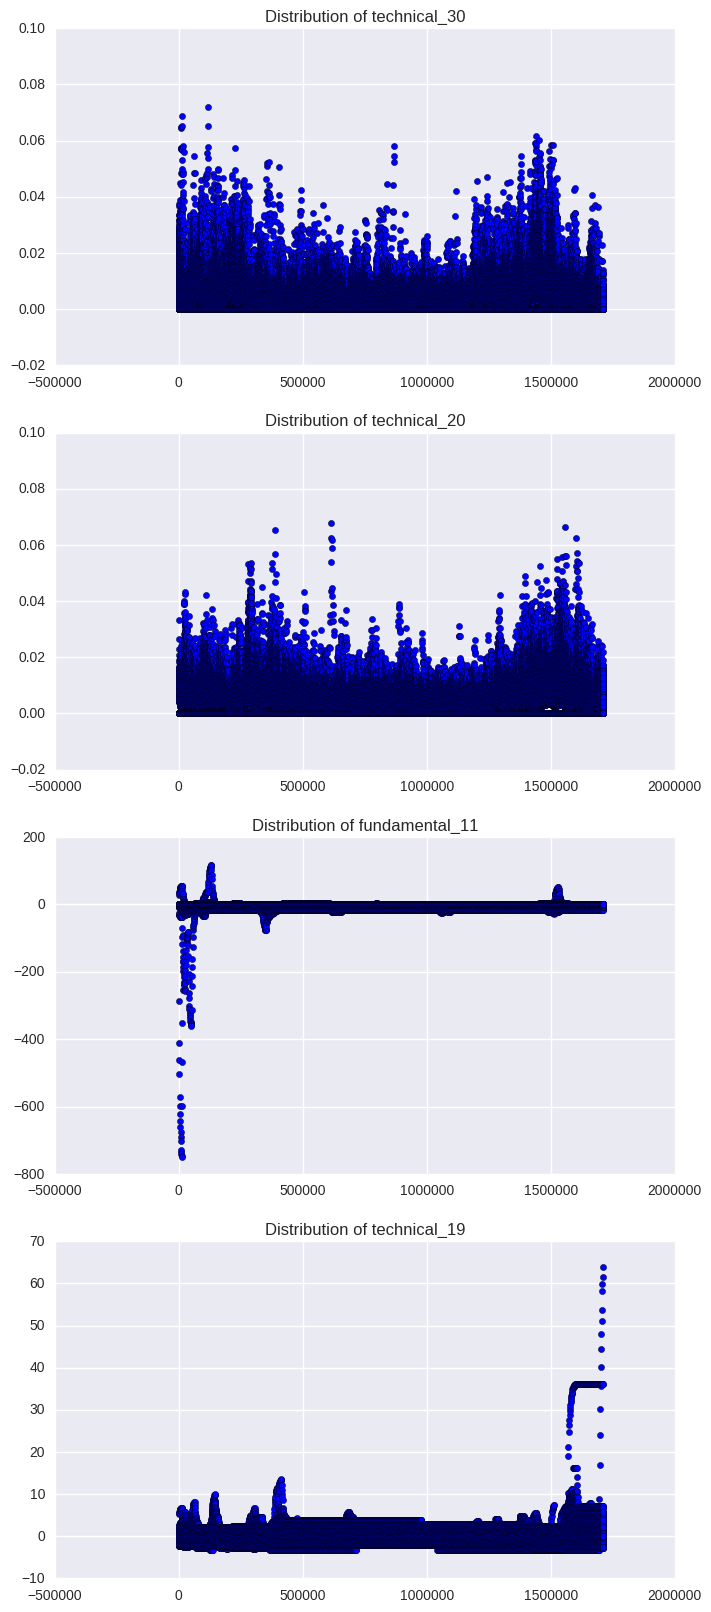

In [8]:
cols_to_use = ['technical_30', 'technical_20', 'fundamental_11', 'technical_19']
fig = plt.figure(figsize=(8, 20))
plot_count = 0
for col in cols_to_use:
    plot_count += 1
    plt.subplot(4, 1, plot_count)
    plt.scatter(range(df.shape[0]), df[col].values)
    plt.title("Distribution of "+col)
plt.show()

Some of the observations from the distribution plot are:

- The top two variables (technical_30 and technical_20) range between 0 and 0.8 and there are no major outliers
- Fundamental_11 has few outliers at the beginning and then looks more or less fine with two small peaks
- Technical_19 has few high values towards the end

**Target Distribution:**

Now let us scatter plot the target variable.



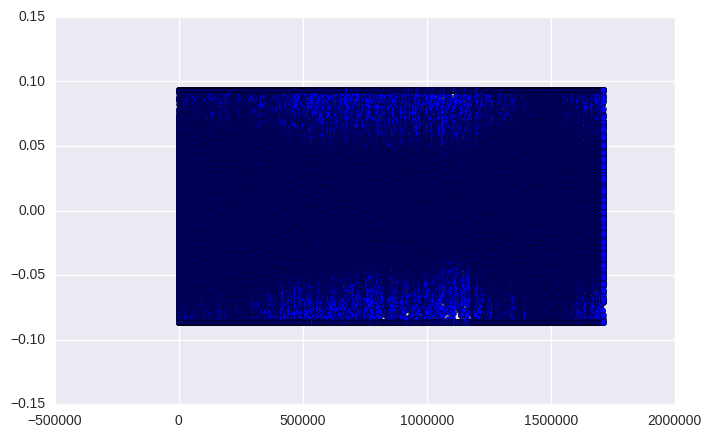

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(range(df.shape[0]), df.y.values)
plt.show()

Target values range between -0.086 to 0.093. 

As we can see the target graph is more darker at the middle, suggesting more values are concentrated in those region. 

Also there seems to be some hard stop at both the ends (probably capping the target to remain within the limits?!) - this could be inferred from the two dark lines at the top and bottom.

Also there seems to be some change in the target distribution with respect to time. As we move from left to right, initially the target is evenly distributed in the given range (-0.08 to 0.09) and then in the middle it is not so.

**Timestamp:**

Now let us look at the counts for each of the timestamps present in the data.

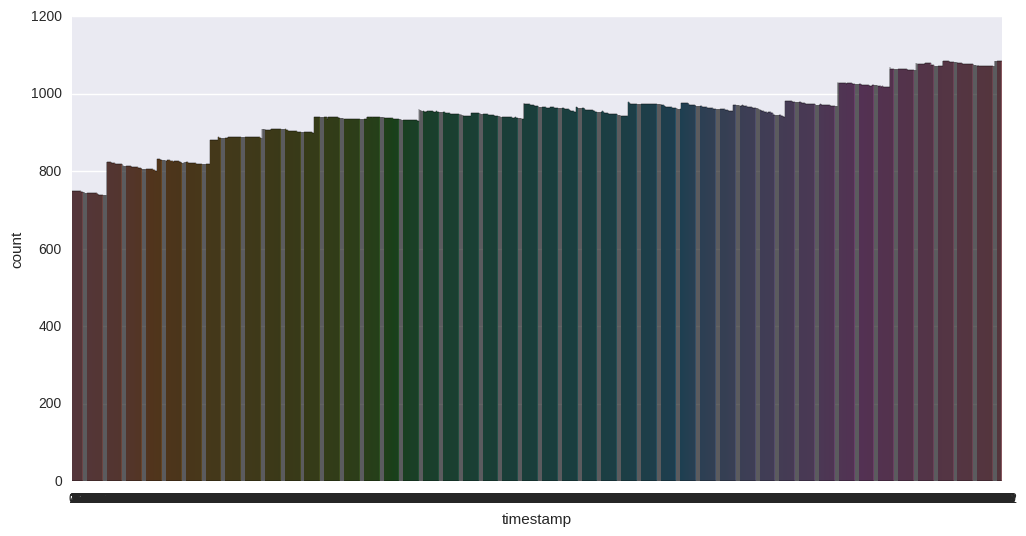

In [15]:
fig = plt.figure(figsize=(12, 6))
sns.countplot(x='timestamp', data=df)
plt.show()

So there is an increasing trend in the number of rows for each of the time stamps. Also there are some sudden jumps in between at intervals. 

To know more, please refer to this excellent kernel by @anokas.

From this [kernel][1], it seems ids are the assets that we are tracking.

So let us see the number of assets that are present in the data.


  [1]: https://www.kaggle.com/ysidhu/two-sigma-financial-modeling/two-sigma-portfolio-returns-eda

In [16]:
print(len(df.id.unique()))

1424


So we have 1424 unique assets in the dataset. As we can see from the previous plot of timestamp, ~1100 assets is the maximum number of assets at any given timestamp. So there are few assets that are dropped in between.

Now we can check the 'y' distribution of some of the assets. Let us first look at ids with high negative mean target values. 

In [11]:
temp_df = df.groupby('id')['y'].agg('mean').reset_index().sort_values(by='y')
temp_df.head()

,id,y
954,1431,-0.035077
62,93,-0.032797
585,882,-0.015408
1085,1637,-0.014028
742,1118,-0.011848


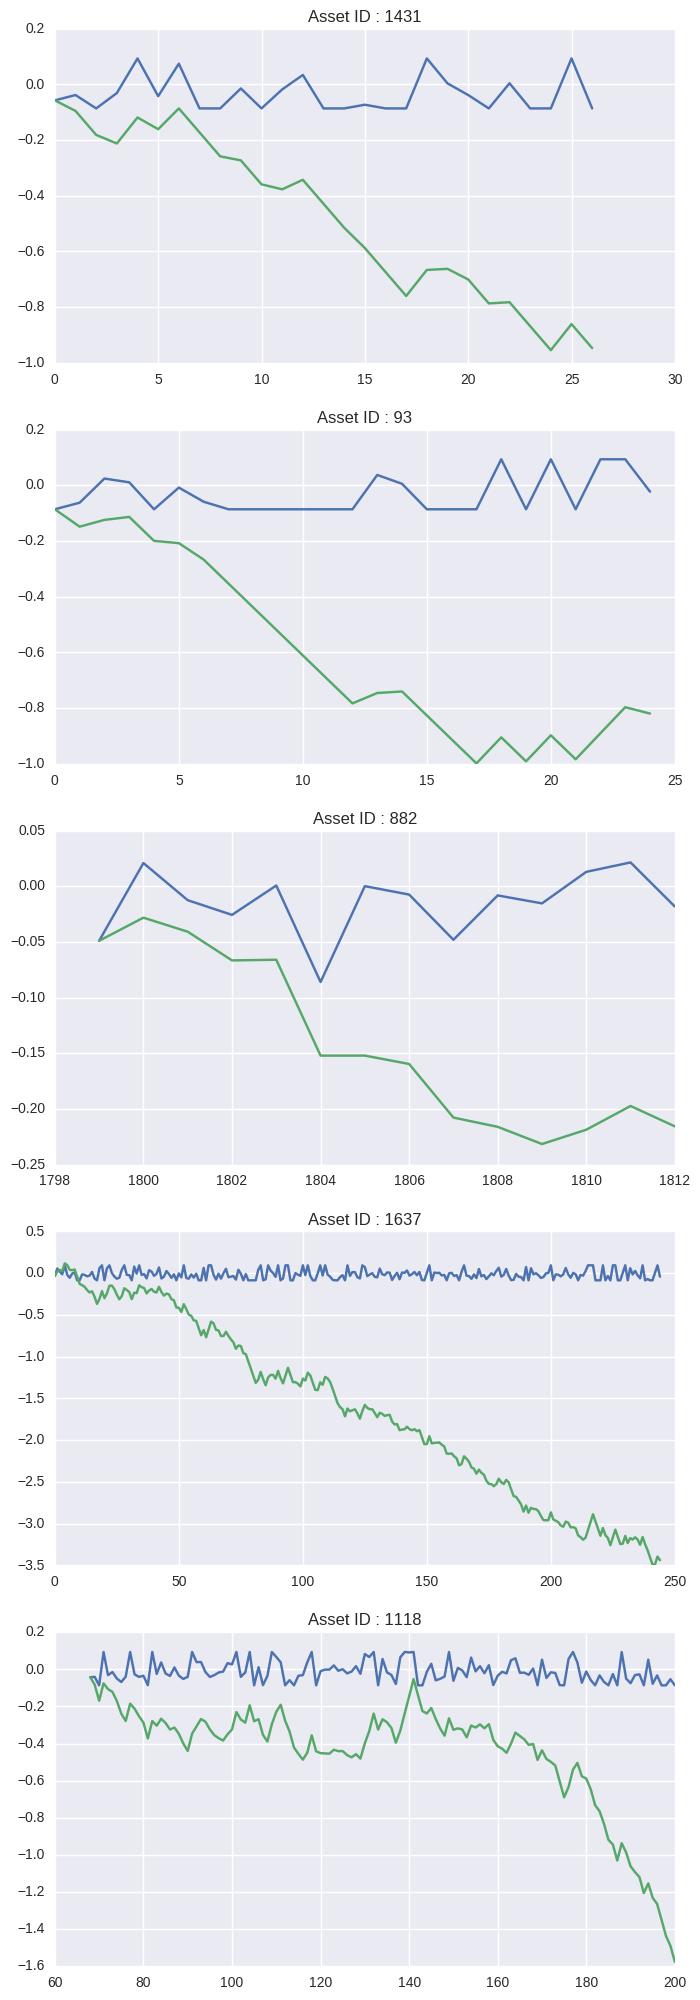

In [20]:
id_to_use = [1431, 93, 882, 1637, 1118]
fig = plt.figure(figsize=(8, 25))
plot_count = 0
for id_val in id_to_use:
    plot_count += 1
    plt.subplot(5, 1, plot_count)
    temp_df = df.ix[df['id']==id_val,:]
    plt.plot(temp_df.timestamp.values, temp_df.y.values)
    plt.plot(temp_df.timestamp.values, temp_df.y.cumsum())
    plt.title("Asset ID : "+str(id_val))
    
plt.show()

Blue line represents the distribution of 'y' variable in the given time stamp. Green line represents the cumulative 'y' value

So 4 out these 5 assets are dropped (as they are not present till the last time stamp which is 1812), when the cumulative negative target value falls steeply. 

Now let us take the assets with high positive mean target value and see their distribution.

In [21]:
temp_df = df.groupby('id')['y'].agg('mean').reset_index().sort_values(by='y')
temp_df.tail()

,id,y
506,767,0.006385
148,226,0.006400
545,824,0.006730
1195,1809,0.007290
726,1089,0.010827


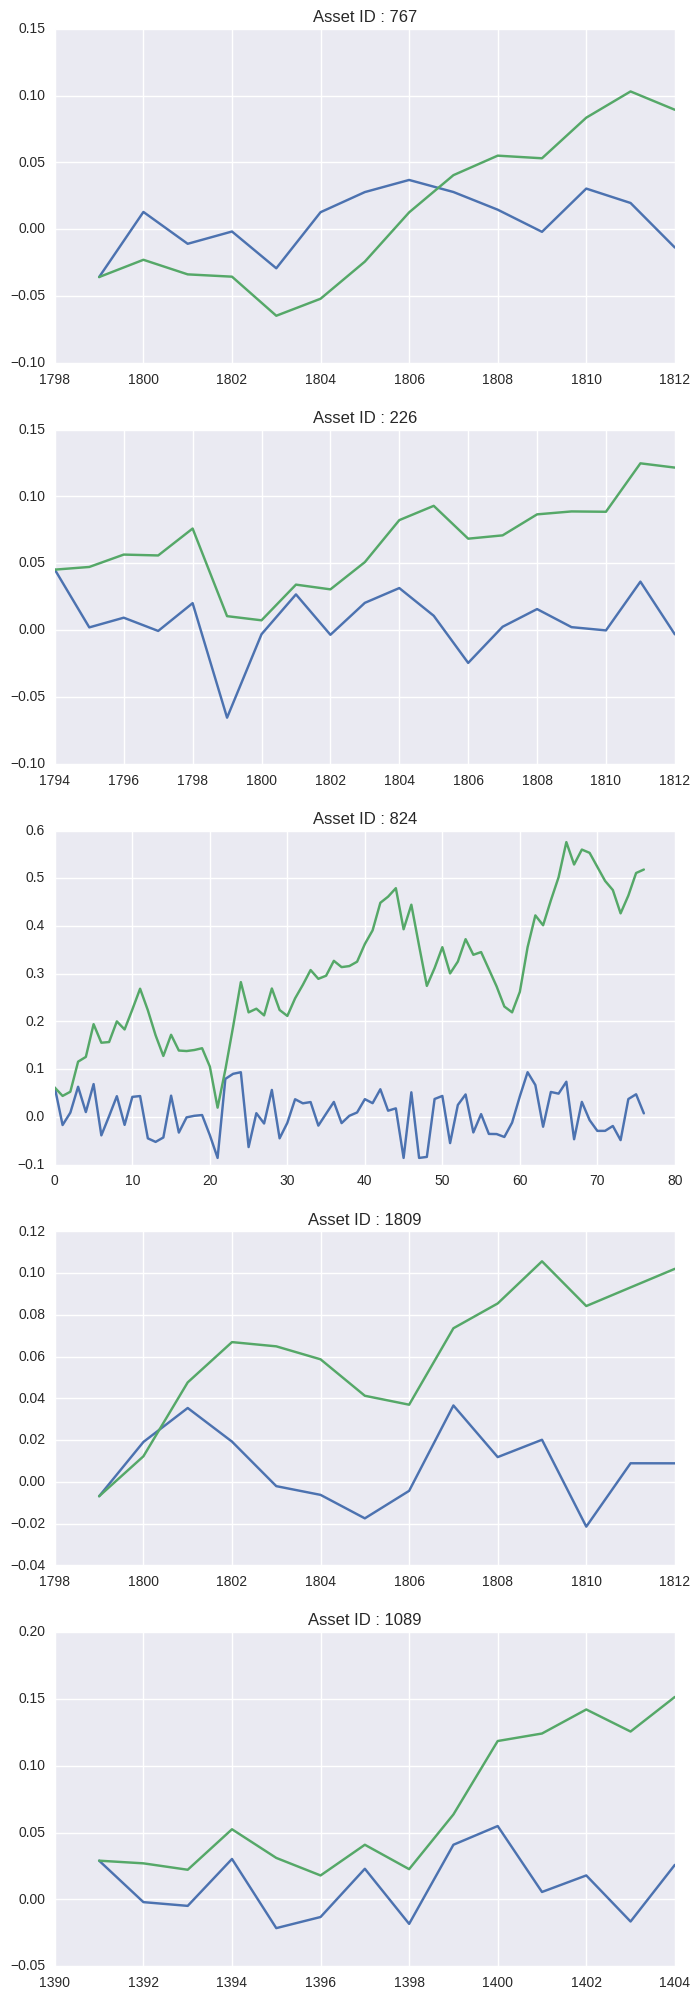

In [22]:
id_to_use = [767, 226, 824, 1809, 1089]
fig = plt.figure(figsize=(8, 25))
plot_count = 0
for id_val in id_to_use:
    plot_count += 1
    plt.subplot(5, 1, plot_count)
    temp_df = df.ix[df['id']==id_val,:]
    plt.plot(temp_df.timestamp.values, temp_df.y.values)
    plt.plot(temp_df.timestamp.values, temp_df.y.cumsum())
    plt.title("Asset ID : "+str(id_val))
plt.show()

Interestingly 2 of these 5 good performing assets are also dropped (Assets 824 and 1089). Not sure about the reasons though.

Now let us take some assets which are present across all the timestamps and see their distribution.

In [15]:
temp_df = df.groupby('id')['y'].agg('count').reset_index().sort_values(by='y')
temp_df.tail()

,id,y
1033,1548,1813
465,699,1813
463,697,1813
469,704,1813
711,1066,1813


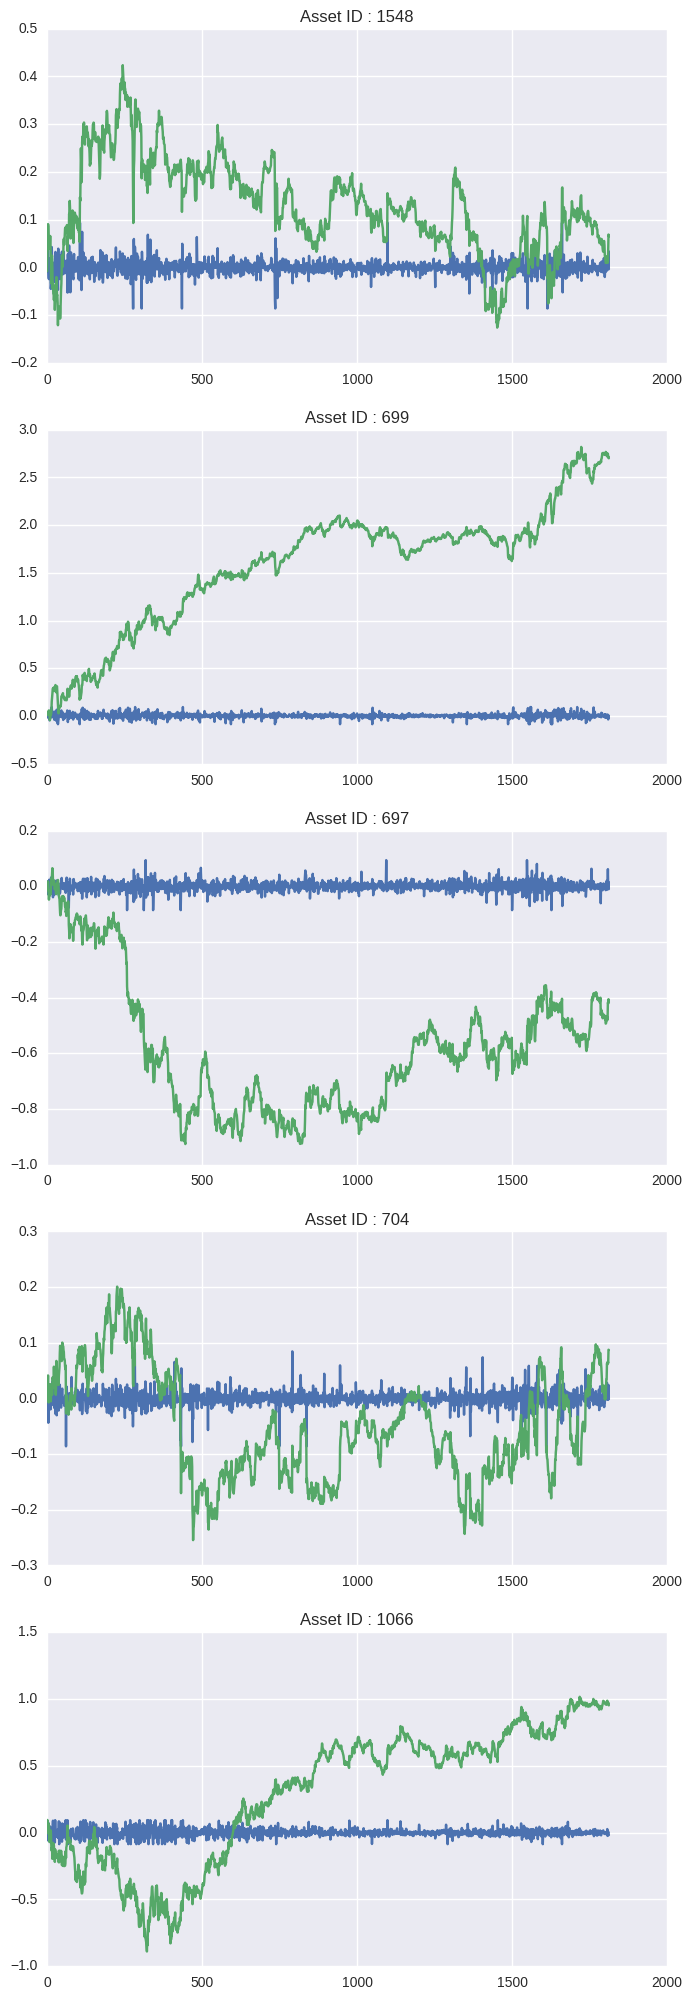

In [23]:
id_to_use = [1548, 699, 697, 704, 1066]
fig = plt.figure(figsize=(8, 25))
plot_count = 0
for id_val in id_to_use:
    plot_count += 1
    plt.subplot(5, 1, plot_count)
    temp_df = df.ix[df['id']==id_val,:]
    plt.plot(temp_df.timestamp.values, temp_df.y.values)
    plt.plot(temp_df.timestamp.values, temp_df.y.cumsum())
    plt.title("Asset ID : "+str(id_val))
plt.show()

Asset 699 looks like a very good asset.! 

To know more about assets, refer to this [excellent kernel][1] by omolluska.

Happy Kaggling.!


  [1]: https://www.kaggle.com/sankhamukherjee/two-sigma-financial-modeling/when-why-are-stocks-bought-and-sold